<a href="https://colab.research.google.com/github/thesuper147/Carbon-Emissions_CS_DSRP/blob/main/Carbon_Emissions_CS_DSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Question: For a consumer, what purchasing habits have the largest impact on their carbon footprint?

In [71]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('/SupplyChainEmissions.csv')

df = df.drop(columns=['2017 NAICS Code', 'Reference USEEIO Code'])


df.rename(columns={
    '2017 NAICS Title': 'Industry',
    'Supply Chain Emission Factors without Margins': 'Emissions_No_Margins',
    'Margins of Supply Chain Emission Factors': 'Margins',
    'Supply Chain Emission Factors with Margins': 'Total_Emissions'
}, inplace=True)


Basic viewing of industry emission scale

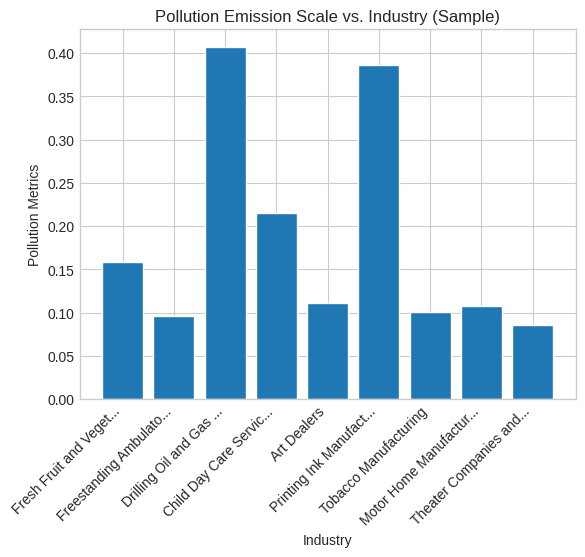

In [80]:
import matplotlib.pyplot as plt



sample_df = df.sample(9)
x_category = sample_df['Industry']
y_value = sample_df['Total_Emissions']

# had to cut off the text because it would become unviewable
plt.bar(
    [label[:21] + '...' if len(label) > 21 else label for label in x_category],
    y_value,
    label="Pollution Emission Scale vs. Industry"
)
plt.xlabel("Industry")
plt.ylabel("Pollution Metrics")
plt.title("Pollution Emission Scale vs. Industry (Sample)")
plt.xticks(rotation=45, ha="right")
plt.show()

Finding the total amount of industries polluting at certain amounts

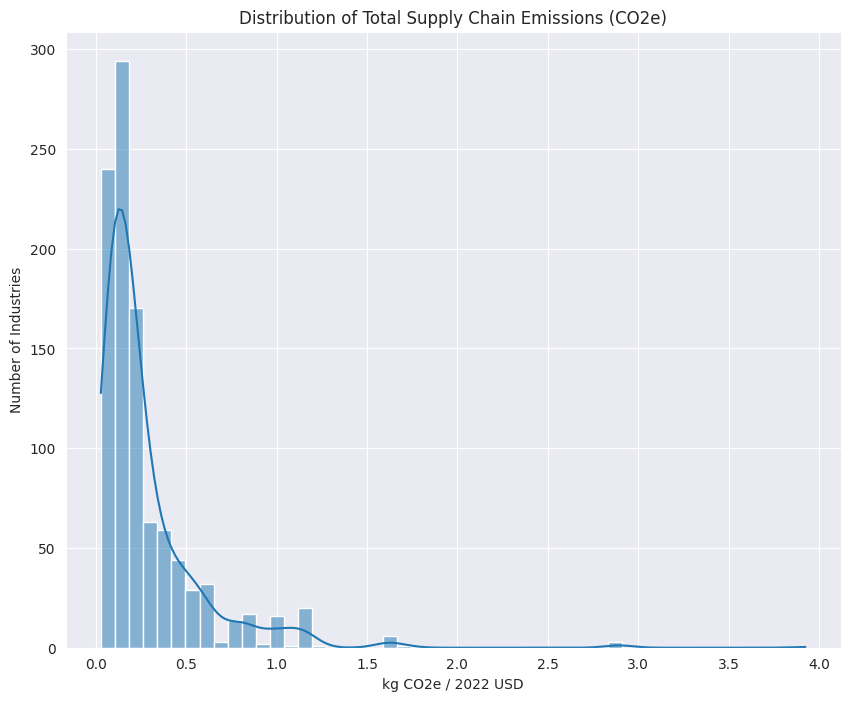

In [48]:

import seaborn as sns


sns.set_style('darkgrid')


plt.figure(figsize=(10, 8))
sns.histplot(df['Total_Emissions'], bins=50, kde=True)
plt.title('Distribution of Total Supply Chain Emissions (CO2e)')
plt.xlabel('kg CO2e / 2022 USD')
plt.ylabel('Number of Industries')
plt.show()


Mapping data to fit research question through categories

In [64]:
import numpy as np

df_consumer = df.copy()


df_consumer['Consumer Category'] = 'Other'

# filtering of industries (2017 naics title) to create specific categories that are usable for project
keywords_map = {
    'Housing & Utilities': ['Power generation', 'Electric', 'Residential', 'Construction', 'Natural gas', 'Water', 'Sewer', 'Furniture', 'Appliance', 'Plumbing'],
    'Food & Beverages': ['Farm', 'Food', 'Animal', 'Fishing', 'Breakfast', 'Cereal', 'Sugar', 'Winery', 'Brewery', 'Restaurant', 'Grocery'],
    'Transportation': ['Automobile', 'Vehicle', 'Gasoline', 'Air transport', 'Rail', 'Transit', 'Pipeline', 'Taxi', 'Airplane', 'Car', 'Train'],
    'Apparel & Footwear': ['Apparel', 'Textile', 'Clothing', 'Fabric', 'Leather', 'Footwear'],
    'Healthcare': ['Hospital', 'Ambulatory', 'Health', 'Pharmaceutical', 'Medical', 'Surgical', 'Surgery', 'Psychology', 'Doctor', 'Pharmacy', 'Veterinary'],
    'Entertainment & Recreation': ['Hotel', 'Amusement', 'Recreation', 'Museum', 'Arts', 'Spectator sports', 'Book', 'Motion picture'],
    'Financial & Professional Services': ['Securities', 'Insurance', 'Credit', 'Monetary', 'Legal', 'Accounting', 'Bank','Financing']
}


for category, keywords in keywords_map.items():
    pattern = '|'.join(keywords)
    mask = df_consumer['Industry'].str.contains(pattern, case=False)
    df_consumer.loc[mask, 'Consumer Category'] = category

# --> samples data for proofing
print("Number of industries assigned to each category:")
print(df_consumer['Consumer Category'].value_counts())


print("\nSample of mapped industries:")
print(df_consumer[['Industry', 'Consumer Category']].sample(10))

Number of industries assigned to each category:
Consumer Category
Other                                685
Transportation                        71
Food & Beverages                      70
Housing & Utilities                   58
Entertainment & Recreation            42
Apparel & Footwear                    35
Financial & Professional Services     29
Healthcare                            26
Name: count, dtype: int64

Sample of mapped industries:
                                              Industry  \
519  Toy and Hobby Goods and Supplies Merchant Whol...   
794                            Graphic Design Services   
568                         Household Appliance Stores   
666                  Navigational Services to Shipping   
271                      Plastics Bottle Manufacturing   
767                       Home Health Equipment Rental   
826                 Offices of Other Holding Companies   
624               Scheduled Freight Air Transportation   
626  Nonscheduled Chartered 

Creating a prototype bar plot to display carbon footprint in each created category


Average GHG Emissions by Consumer Spending Category:
Consumer Category
Food & Beverages                     0.567143
Transportation                       0.351028
Apparel & Footwear                   0.230200
Housing & Utilities                  0.221103
Entertainment & Recreation           0.143667
Healthcare                           0.118654
Financial & Professional Services    0.064138
Name: Total_Emissions, dtype: float64


/tmp/ipython-input-81-3664030487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_emissions.values, y=category_emissions.index, palette='viridis')


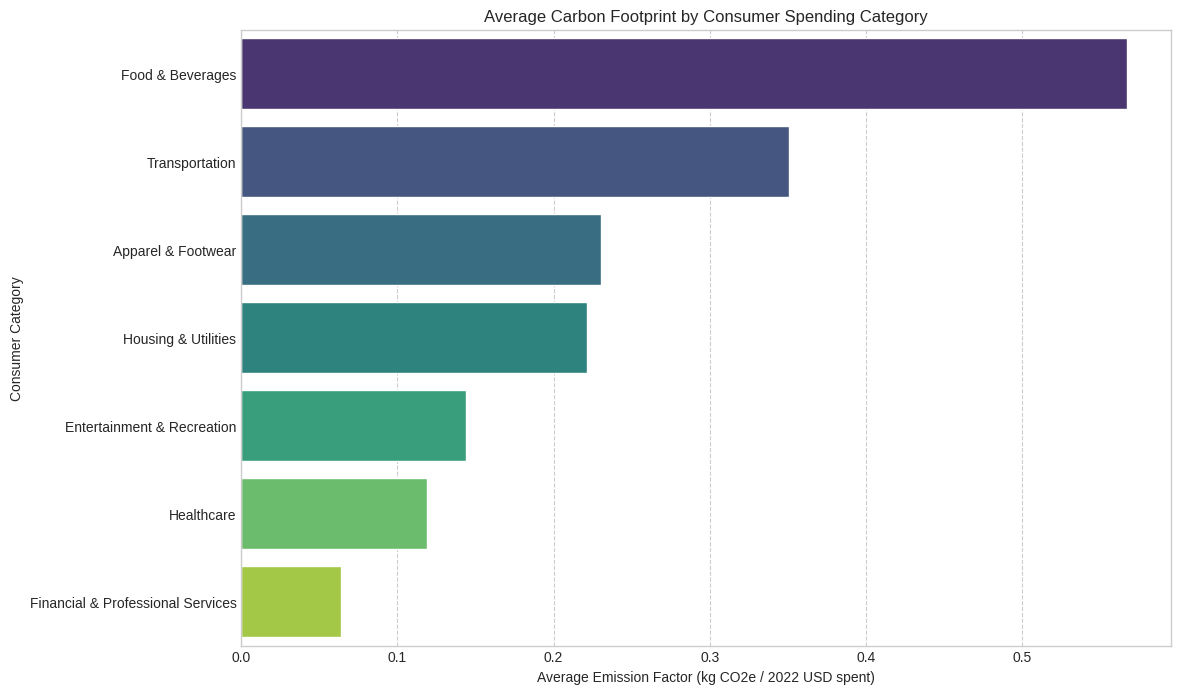

In [81]:
# average emission factor for each consumer categ
category_emissions = df_consumer.groupby('Consumer Category')['Total_Emissions'].mean().sort_values(ascending=False)

print("\nAverage GHG Emissions by Consumer Spending Category:")
print(category_emissions)


plt.figure(figsize=(12, 8))
sns.barplot(x=category_emissions.values, y=category_emissions.index, palette='viridis')
plt.title('Average Carbon Footprint by Consumer Spending Category')
plt.xlabel('Average Emission Factor (kg CO2e / 2022 USD spent)')
plt.ylabel('Consumer Category')
plt.grid(axis='x', linestyle='--')
plt.show()